# Análisis estadístico y Machine Learning para mantenimiento predictivo

Este notebook presenta un análisis exploratorio de datos (EDA), preprocesamiento y modelado con Machine Learning para identificar patrones y correlaciones entre variables que permitan anticipar fallas en máquinas industriales.  
El objetivo es desarrollar una base sólida para sistemas de **mantenimiento predictivo**, reduciendo tiempos de inactividad y optimizando recursos.

## Resumen del proyecto
- **Dataset:** [Smart Manufacturing IoT Cloud Monitoring Dataset](https://www.kaggle.com/datasets/ziya07/smart-manufacturing-iot-cloud-monitoring-dataset)
- **Filas y columnas:** 100,001 registros y 13 variables.
- **Variables clave:** `machine_id`, `temperature`, `machine_status`, `anomaly_flag`
- **Técnicas utilizadas:**  
  - Análisis estadístico descriptivo  
  - Detección de outliers  
  - Matriz de correlación  
  - Algoritmo `RandomForestClassifier` para predicción de fallas  
  - Métricas de evaluación (accuracy, precision, recall, F1-score)

## Objetivo
Proporcionar un flujo de trabajo reproducible para:
1. Analizar y comprender datos de monitoreo de máquinas, adeams de encontrar correlaciones.
2. Identificar las variables más influyentes en las fallas.
3. Estimar de forma anticipada qué máquinas podrían requerir mantenimiento.



#Carga de datos y lectura

In [42]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import numpy as np
import dash_bootstrap_components as dbc

DataFrame = pd.read_csv("D:\Enginner IA\Proyecto Dashboard\Data\smart_manufacturing_data.csv")

#Inicializar app dashboard
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

<>:7: SyntaxWarning:

invalid escape sequence '\E'

<>:7: SyntaxWarning:

invalid escape sequence '\E'

C:\Users\Alberto\AppData\Local\Temp\ipykernel_14648\1396236361.py:7: SyntaxWarning:

invalid escape sequence '\E'



Limpieza e inspección

In [43]:
print(DataFrame.isnull().sum()) 

#si hay borrarlos
DataFrame =DataFrame.dropna()

#ordenar por fecha
DataFrame.sort_values(by="timestamp", inplace=True)
print(DataFrame["timestamp"])
#en un dado caso podemos rellanrlos con el valor inmediato anterior o el promedio
#DataFrame["temperature"].fillna(method='ffill', inplace=True)  # usa el último valor válido
#DataFrame["vibration"].fillna(DataFrame["vibration"].mean(), inplace=True)  # con la media

print("Primeras filas: ")
display(DataFrame.head(10))

print(pd.DataFrame(DataFrame.dtypes, columns=['dtype']))

print("Dimenciones en fila x columnas: ", DataFrame.shape)




timestamp                   0
machine_id                  0
temperature                 0
vibration                   0
humidity                    0
pressure                    0
energy_consumption          0
machine_status              0
anomaly_flag                0
predicted_remaining_life    0
failure_type                0
downtime_risk               0
maintenance_required        0
dtype: int64
0        2025-01-01 00:00:00
1        2025-01-01 00:01:00
2        2025-01-01 00:02:00
3        2025-01-01 00:03:00
4        2025-01-01 00:04:00
                ...         
99995    2025-03-11 10:35:00
99996    2025-03-11 10:36:00
99997    2025-03-11 10:37:00
99998    2025-03-11 10:38:00
99999    2025-03-11 10:39:00
Name: timestamp, Length: 100000, dtype: object
Primeras filas: 


,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-01 00:00:00,39,78.61,28.65,79.96,3.73,2.16,1,0,106,Normal,0.0,0
1,2025-01-01 00:01:00,29,68.19,57.28,35.94,3.64,0.69,1,0,320,Normal,0.0,0
2,2025-01-01 00:02:00,15,98.94,50.20,72.06,1.00,2.49,1,1,19,Normal,1.0,1
3,2025-01-01 00:03:00,43,90.91,37.65,30.34,3.15,4.96,1,1,10,Normal,1.0,1
4,2025-01-01 00:04:00,8,72.32,40.69,56.71,2.68,0.63,2,0,65,Vibration Issue,0.0,1
5,2025-01-01 00:05:00,21,70.88,38.38,51.01,3.19,3.24,1,0,381,Normal,0.0,0
6,2025-01-01 00:06:00,39,73.05,40.70,61.59,2.35,1.63,1,0,470,Normal,0.0,0
7,2025-01-01 00:07:00,19,90.00,56.52,48.32,3.30,3.30,1,0,136,Normal,0.0,0
8,2025-01-01 00:08:00,23,96.04,24.98,50.47,1.59,3.08,1,1,38,Normal,1.0,1
9,2025-01-01 00:09:00,11,55.33,49.29,33.85,2.14,3.74,0,0,190,Normal,0.0,0


                            dtype
timestamp                  object
machine_id                  int64
temperature               float64
vibration                 float64
humidity                  float64
pressure                  float64
energy_consumption        float64
machine_status              int64
anomaly_flag                int64
predicted_remaining_life    int64
failure_type               object
downtime_risk             float64
maintenance_required        int64
Dimenciones en fila x columnas:  (100000, 13)


### Identificacion de datos

In [44]:
num_cols = DataFrame.select_dtypes(include=np.number).columns.tolist()
cat_cols = []
for c in DataFrame.columns:
    if c not in num_cols:
        cat_cols.append(c)
print(f"Total de variables numericas {len(num_cols)}:", num_cols)
print(f"Variables categóricas/no numéricas {len(cat_cols)}:", cat_cols)

#count es nbumero de valores no nulos
if num_cols:
    desc = DataFrame[num_cols].describe().T # Transpuesta wws ve mejor xd
    display(desc)
else:
    print("No se detectaron columnas numéricas.")

if cat_cols:
    desc = DataFrame[cat_cols].describe().T # Transpuesta wws ve mejor xd
    display(desc)
else:
    print("No se detectaron columnas numéricas.")


"""Si la desviación estándar es pequeña, los datos están muy cerca de la media.

Si es grande, los datos están muy dispersos.


para datos categoricos 

count	Número de valores no nulos
unique	Número de valores únicos
top	Valor más frecuente
freq	Frecuencia del valor más frecuente"""

Total de variables numericas 11: ['machine_id', 'temperature', 'vibration', 'humidity', 'pressure', 'energy_consumption', 'machine_status', 'anomaly_flag', 'predicted_remaining_life', 'downtime_risk', 'maintenance_required']
Variables categóricas/no numéricas 2: ['timestamp', 'failure_type']


,count,mean,std,min,25%,50%,75%,max
machine_id,100000.0,25.499330,14.389439,1.00,13.0000,25.00,38.00,50.00
temperature,100000.0,75.015625,10.031884,35.55,68.2675,75.06,81.75,121.94
vibration,100000.0,50.012270,14.985444,-17.09,39.9700,49.96,60.10,113.80
humidity,100000.0,54.995401,14.437960,30.00,42.5200,54.98,67.50,80.00
pressure,100000.0,3.000405,1.152399,1.00,2.0000,3.01,4.00,5.00
energy_consumption,100000.0,2.747064,1.297865,0.50,1.6300,2.74,3.87,5.00
machine_status,100000.0,1.002050,0.446193,0.00,1.0000,1.00,1.00,2.00
anomaly_flag,100000.0,0.089160,0.284976,0.00,0.0000,0.00,0.00,1.00
predicted_remaining_life,100000.0,234.269160,150.063062,1.00,97.0000,230.00,365.00,499.00
downtime_risk,100000.0,0.089155,0.284961,0.00,0.0000,0.00,0.00,1.00


,count,unique,top,freq
timestamp,100000,100000,2025-01-01 00:00:00,1
failure_type,100000,5,Normal,91899


'Si la desviación estándar es pequeña, los datos están muy cerca de la media.\n\nSi es grande, los datos están muy dispersos.\n\n\npara datos categoricos \n\ncount\tNúmero de valores no nulos\nunique\tNúmero de valores únicos\ntop\tValor más frecuente\nfreq\tFrecuencia del valor más frecuente'

### Valores atipicos


{'machine_id': 0, 'temperature': 289, 'vibration': 281, 'humidity': 0, 'pressure': 0, 'energy_consumption': 0, 'machine_status': 0, 'anomaly_flag': 8916, 'predicted_remaining_life': 0, 'downtime_risk': 8912, 'maintenance_required': 0}


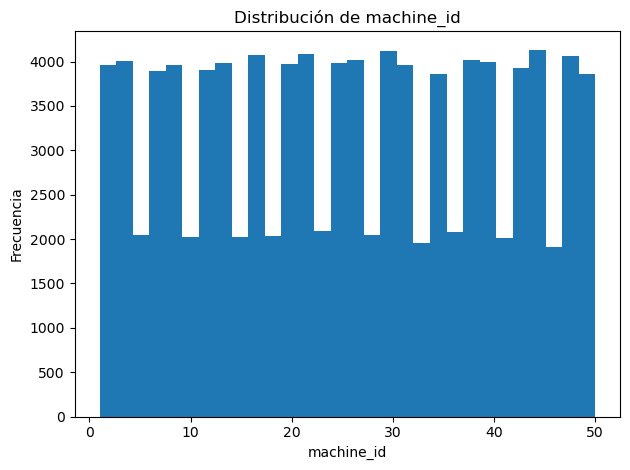

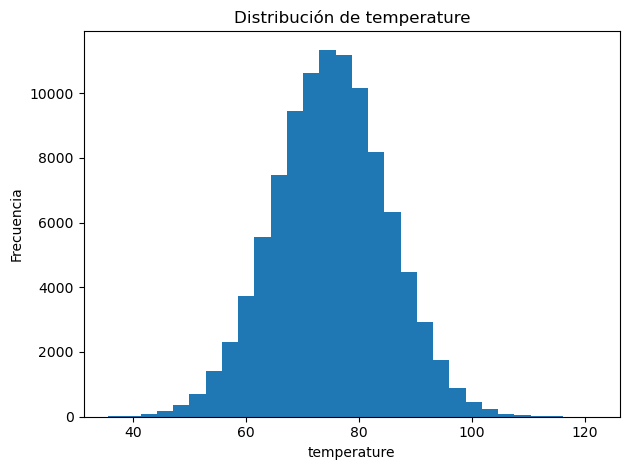

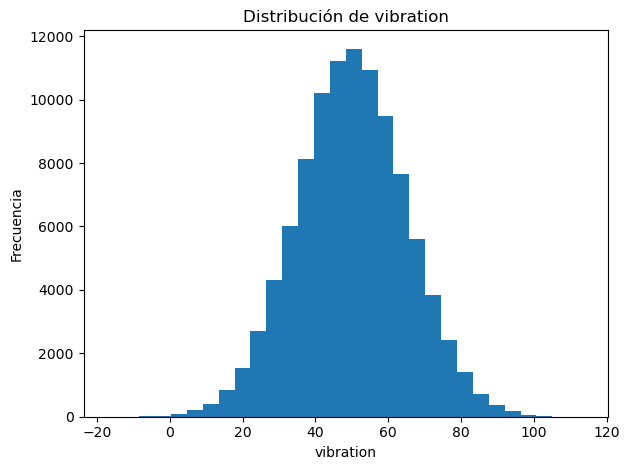

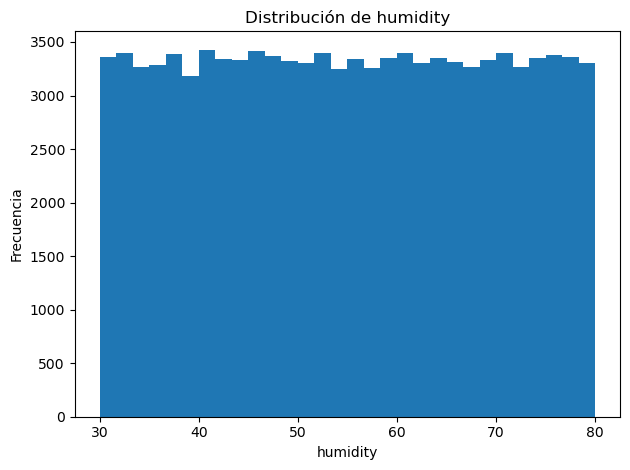

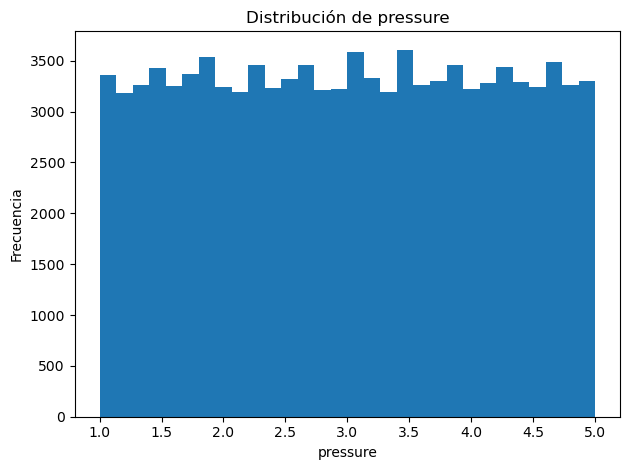

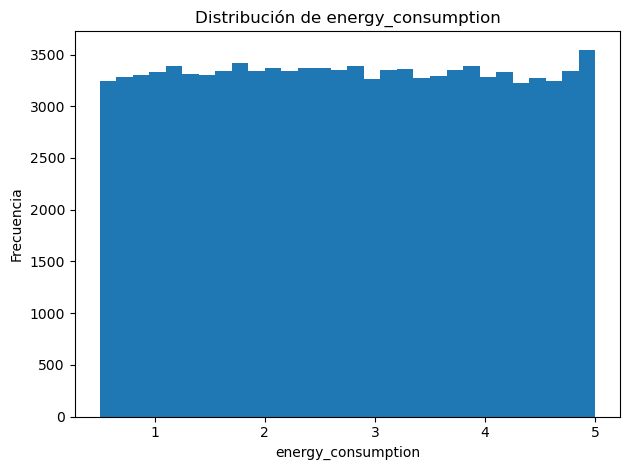

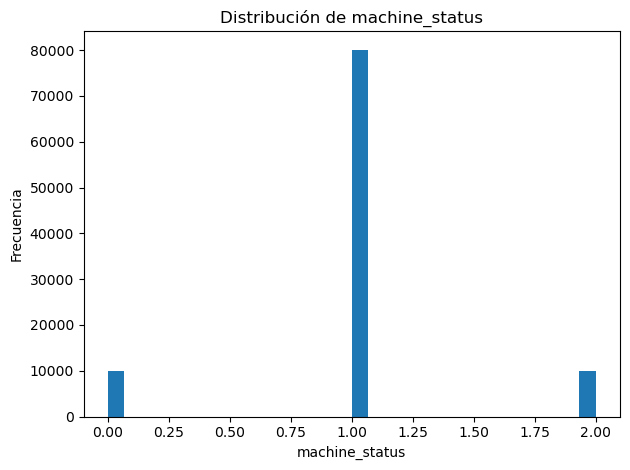

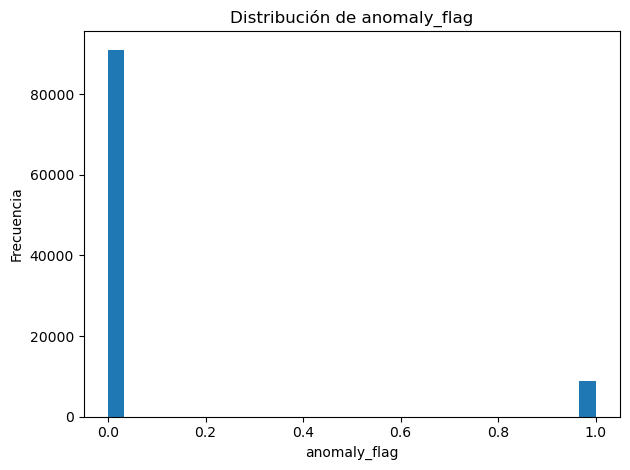

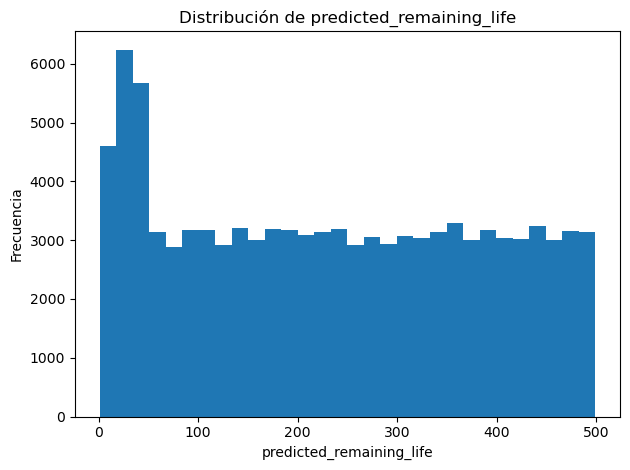

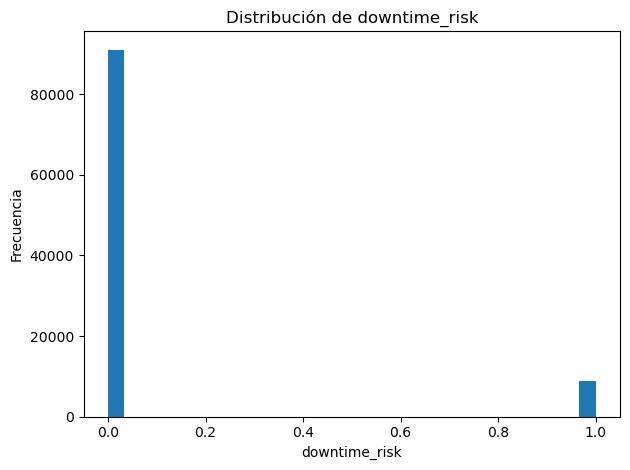

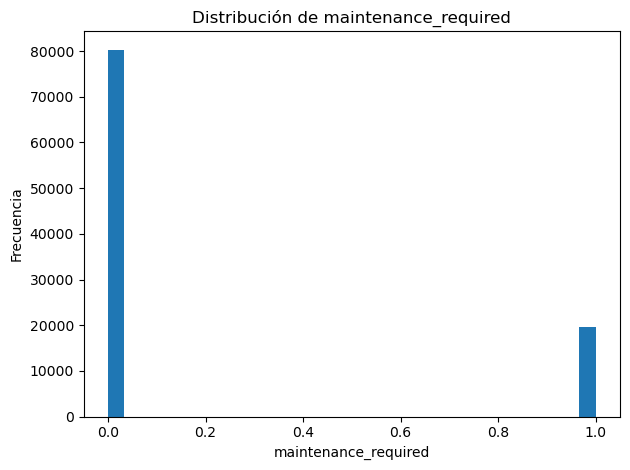

In [45]:
atipicos = {}
for columna in num_cols:
    nums = pd.to_numeric(DataFrame[columna], errors='coerce').dropna()
    #Evita columnas vacías o constantes (sin desviación).
    if nums.size == 0 or nums.std(ddof=0) == 0:
        atipicos[columna] = 0
        continue
    z = (nums -nums.mean()) / nums.std(ddof=0)
    atipicos[columna] = int((np.abs(z) > 3).sum())

print(atipicos)
import matplotlib.pyplot as plt

# === Histogramas de variables numéricas ===
for col in num_cols:
    fig = plt.figure()  # Cada gráfico en su propia figura
    plt.hist(DataFrame[col].dropna(), bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

Normalización (Estos olo aplica para modelo de ML)

In [46]:
from sklearn.preprocessing import MinMaxScaler
# Esto es una normlizacion tipica de valores en ttre 0 y 1
scaler = MinMaxScaler()
#DataFrame[["temperature", "vibration"]] = scaler.fit_transform(DataFrame[["temperature", "vibration"]])

Diseño


In [47]:
#inpsecionar columnas
print(DataFrame.columns)

#aqui podemos crear tantas representaciones sean necesarias para encontrar correlaciones entre las variables
app.layout = dbc.Container([
    html.H2("Dashboard Inteligente – Monitoreo Industrial"),
    dcc.Graph(id="grafica-temp", figure=px.line(DataFrame, x="timestamp", y="temperature", title="Temperatura del sistema")),
    dcc.Graph(id="grafica-vib", figure=px.line(DataFrame, x="timestamp", y="vibration", title="Vibración del sistema")),
    dcc.Graph(id="grafica-machine", figure=px.line(DataFrame, x="machine_id", y="temperature", title="Machines vs temperature")),
    dcc.Graph(
    id="maintenance-time",
    figure=px.scatter(
        DataFrame,
        x="timestamp",
        y="machine_id",
        color="maintenance_required",
        title="Mantenimiento por Máquina y Tiempo",
        labels={"maintenance_required": "¿Requiere mantenimiento?"},
        color_discrete_map={0: "green", 1: "red"}
    )
),
dcc.Graph(
    id="mantenance-timeline",
    figure=px.line(
        DataFrame,
        x="timestamp",
        y="maintenance_required",
        color="machine_id",
        title="Evolución de mantenimiento requerido"
    )
),

    html.Div(id="alerta", children="")
])




Index(['timestamp', 'machine_id', 'temperature', 'vibration', 'humidity',
       'pressure', 'energy_consumption', 'machine_status', 'anomaly_flag',
       'predicted_remaining_life', 'failure_type', 'downtime_risk',
       'maintenance_required'],
      dtype='object')


### Matriz de correlaciones

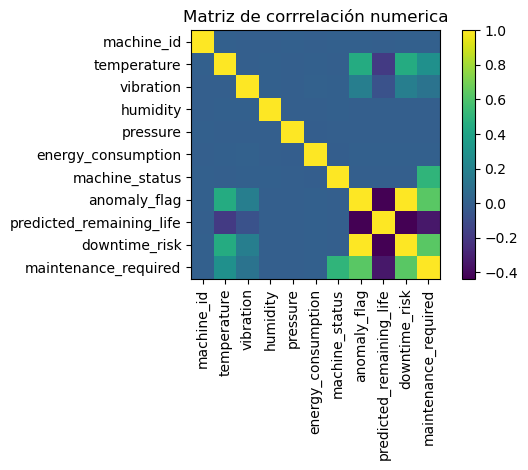

In [48]:
if len(num_cols) >= 2:
    correlacion = DataFrame[num_cols].corr(numeric_only=True)
    fig = plt.figure()
    plt.imshow(correlacion, interpolation='nearest')
    plt.title("Matriz de corrrelación numerica")
    plt.colorbar()
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas numéricas para calcular correlación.")


Ejecucion


In [49]:
if __name__ == '__main__':
    app.run(debug=True)


A partir de esto se pueden hacer inferencias

In [50]:
# Machines with more failures
DataFrame.groupby("machine_id")["maintenance_required"].sum().sort_values(ascending=False)#.idxmin() #.idxmax() el modulo idxmax nos da cual fallo mas lo mismo con min


machine_id
30    433
5     428
29    427
32    426
45    424
26    422
24    418
44    417
42    417
28    417
36    415
4     413
2     412
43    410
50    410
9     409
15    408
23    406
18    403
48    403
6     403
17    400
47    400
33    398
22    398
38    398
1     390
13    389
39    386
16    383
49    381
3     381
35    380
46    379
25    379
7     379
21    378
8     377
27    377
40    375
12    375
14    373
34    371
31    368
10    365
37    364
20    364
11    362
19    358
41    348
Name: maintenance_required, dtype: int64

In [51]:

# Failure more common
DataFrame["failure_type"].value_counts() 


failure_type
Normal              91899
Vibration Issue      3129
Overheating          1989
Pressure Drop        1969
Electrical Fault     1014
Name: count, dtype: int64

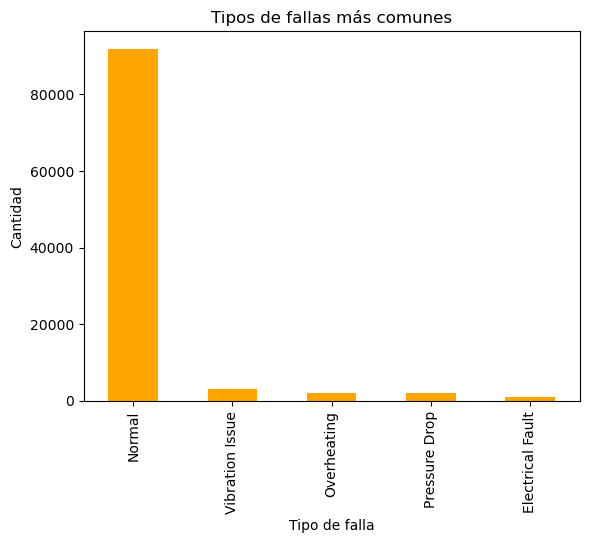

In [52]:
#visualize
import matplotlib.pyplot as plt

DataFrame["failure_type"].value_counts().plot(kind="bar", color="orange")
plt.title("Tipos de fallas más comunes")
plt.xlabel("Tipo de falla")
plt.ylabel("Cantidad")
plt.show()


Analisis predictorio con ML

In [53]:

suspects = ['downtime_risk','predicted_remaining_life','machine_status','anomaly_flag']
target = 'maintenance_required'

for col in suspects:
    if col in DataFrame.columns:
        same = (DataFrame[col].astype(str) == DataFrame[target].astype(str)).mean()
        print(col, '== target ratio:', round(same, 4))

# Correlación numérica muy alta con el target (si ambos son numéricos 0/1):
abs_corr = DataFrame[suspects + [target]].corr(numeric_only=True)[target].drop(target).abs().sort_values(ascending=False)
print(abs_corr)
# Columnas con fuga
leak_cols = ['failure_type','timestamp', 'anomaly_flag', 'downtime_risk', 'machine_status', 'predicted_remaining_life']


X = DataFrame.drop(columns=leak_cols + [target])
y = DataFrame[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))


downtime_risk == target ratio: 0.0
predicted_remaining_life == target ratio: 0.0018
machine_status == target ratio: 0.1734
anomaly_flag == target ratio: 0.8922
anomaly_flag                0.631728
downtime_risk               0.631726
machine_status              0.503827
predicted_remaining_life    0.342990
Name: maintenance_required, dtype: float64
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     16091
           1       1.00      0.46      0.63      3909

    accuracy                           0.89     20000
   macro avg       0.94      0.73      0.78     20000
weighted avg       0.91      0.89      0.88     20000



=== Modelo sin balancear ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     16091
           1       1.00      0.46      0.63      3909

    accuracy                           0.89     20000
   macro avg       0.94      0.73      0.78     20000
weighted avg       0.91      0.89      0.88     20000


=== Modelo balanceado ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     16091
           1       1.00      0.46      0.63      3909

    accuracy                           0.89     20000
   macro avg       0.94      0.73      0.78     20000
weighted avg       0.91      0.89      0.88     20000



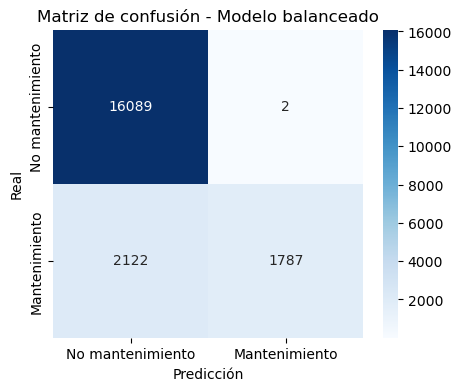

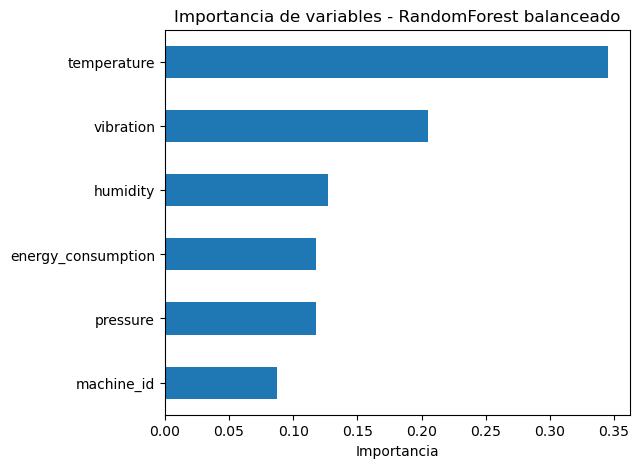

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


print("=== Modelo sin balancear ===")
print(classification_report(y_test, y_pred))

modelo_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_bal.fit(X_train, y_train)
y_pred_bal = modelo_bal.predict(X_test)

print("\n=== Modelo balanceado ===")
print(classification_report(y_test, y_pred_bal))

# --- 2) Matriz de confusión ---
cm = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No mantenimiento', 'Mantenimiento'],
            yticklabels=['No mantenimiento', 'Mantenimiento'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión - Modelo balanceado")
plt.show()

# --- 3) Importancia de variables ---
importancias = pd.Series(modelo_bal.feature_importances_, index=X.columns)
importancias.sort_values(ascending=True).plot(kind='barh', figsize=(6,5))
plt.title("Importancia de variables - RandomForest balanceado")
plt.xlabel("Importancia")
plt.show()


## Conclusiones:

El análisis permitió identificar que las variables más relevantes para predecir el mantenimiento son temperature y vibration, seguidas de humidity, energy_consumption y pressure. Ademas el modelo Random Forest balanceado alcanzó una alta precisión para la clase No mantenimiento (~100%), pero mostró dificultades para detectar la clase Mantenimiento (~46% de recall). Este resultado sugiere que el conjunto de datos presenta desbalance de clases, lo que influye en la capacidad del modelo para identificar casos positivos de mantenimiento.

A pesar de estas limitaciones, el modelo es útil como herramienta inicial de diagnóstico preventivo, con potencial de mejora aplicando técnicas de balanceo y ajustando hiperparámetros.

